In [1]:
# 加载波士顿房价数据
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


In [0]:
# 数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
# 模型定义
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [10]:
# K折验证
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print ('processing fold # ', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                         train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
                        [train_targets[:i*num_val_samples],
                         train_targets[(i+1)*num_val_samples:]], axis=0) 
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)     

processing fold #  0









processing fold #  1
processing fold #  2
processing fold #  3


In [11]:
np.mean(all_scores)

2.2861866133637947

In [14]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print ('processing fold # ', i)
    val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

    partial_train_data = np.concatenate(
                        [train_data[:i*num_val_samples],
                         train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
                        [train_targets[:i*num_val_samples],
                         train_targets[(i+1)*num_val_samples:]], axis=0) 
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs,
              batch_size=64)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)  

processing fold #  0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 825us/step - loss: 577.2770 - mean_absolute_error: 22.4035 - val_loss: 553.9238 - val_mean_absolute_error: 21.5543
Epoch 2/500
303/303 [==============================] - 0s 68us/step - loss: 562.6520 - mean_absolute_error: 22.0842 - val_loss: 541.8327 - val_mean_absolute_error: 21.2953
Epoch 3/500
303/303 [==============================] - 0s 55us/step - loss: 551.8814 - mean_absolute_error: 21.8509 - val_loss: 531.3302 - val_mean_absolute_error: 21.0674
Epoch 4/500
303/303 [==============================] - 0s 54us/step - loss: 542.1117 - mean_absolute_error: 21.6335 - val_loss: 521.3691 - val_mean_absolute_error: 20.8519
Epoch 5/500
303/303 [==============================] - 0s 62us/step - loss: 532.6904 - mean_absolute_error: 21.4239 - val_loss: 511.4364 - val_mean_absolute_error: 20.6412
Epoch 6/500
303/303 [==============================] - 0s 57us/step - lo

In [0]:
# 计算所有论词中的K折验证分数平均值
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

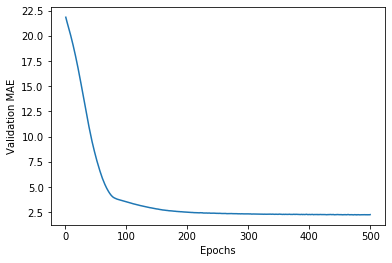

In [24]:
# 绘制验证分数
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

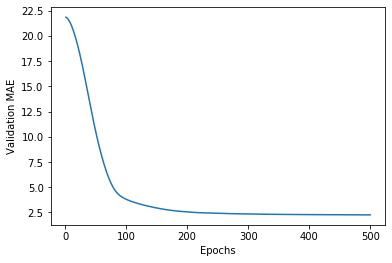

In [25]:
# 绘制验证分数（平滑）
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history)

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [26]:
# 训练最终模型
model = build_model()
model.fit(train_data, train_targets,
          epochs=80,
          batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/80
404/404 [==============================] - 0s 1ms/step - loss: 542.0514 - mean_absolute_error: 21.3530
Epoch 2/80
404/404 [==============================] - 0s 161us/step - loss: 494.8119 - mean_absolute_error: 20.3019
Epoch 3/80
404/404 [==============================] - 0s 190us/step - loss: 447.8375 - mean_absolute_error: 19.2057
Epoch 4/80
404/404 [==============================] - 0s 179us/step - loss: 397.5096 - mean_absolute_error: 17.9673
Epoch 5/80
404/404 [==============================] - 0s 199us/step - loss: 345.8012 - mean_absolute_error: 16.5634
Epoch 6/80
404/404 [==============================] - 0s 188us/step - loss: 292.5550 - mean_absolute_error: 15.0275
Epoch 7/80
404/404 [==============================] - 0s 167us/step - loss: 242.1577 - mean_absolute_error: 13.3903
Epoch 8/80
404/404 [==============================] - 0s 165us/step - loss: 196.0129 - mean_absolute_error: 11.7018
Epoch 9/80
404/404 [==============================] - 0s 163us/step - loss

In [27]:
test_mae_score

3.0117171044443167